# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.236508e+01     6.603889e+00
 * time: 0.004059791564941406
     1     2.957642e+01     5.090364e+00
 * time: 0.012127876281738281
     2     2.573777e+01     9.217233e+00
 * time: 0.03143191337585449
     3     1.586188e+01     3.364477e+00
 * time: 0.05392289161682129
     4     1.273550e+01     1.505319e+00
 * time: 0.0726168155670166
     5     1.131941e+01     1.031196e+00
 * time: 0.09146285057067871
     6     1.085590e+01     2.653683e+00
 * time: 0.10651493072509766
     7     1.016253e+01     1.311495e+00
 * time: 0.1721799373626709
     8     9.648519e+00     9.839140e-01
 * time: 0.1878809928894043
     9     9.103134e+00     1.194487e+00
 * time: 0.20298290252685547
    10     8.925179e+00     8.401733e-01
 * time: 0.21833300590515137
    11     8.805704e+00     4.725453e-01
 * time: 0.23352479934692383
    12     8.705049e+00     5.113033e-01
 * time: 0.24498391151428223
    13     8.640168e+00     4.485688e-01
 * time: 

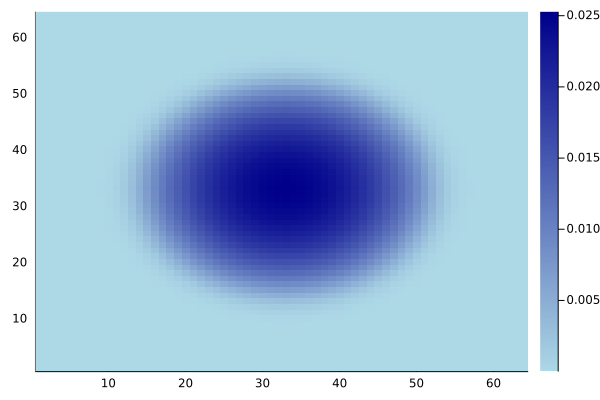

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)